In [1]:
import pandas as pd
df = pd.read_csv("./big/testdata/04_음식관련 카드소비_CARD_SPENDING.CSV",encoding="CP949")

In [6]:
print(df.shape)
df.head()

(544805, 8)


,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675
2,2018-01-15,제주시,50110650,연동,C01200,농축수산물,236,16089579
3,2018-01-15,제주시,50110650,연동,A00200,마트/슈퍼마켓,4031,121979867
4,2018-01-20,제주시,50110650,연동,C01000,식품,633,30410674


In [7]:
df['base_datetime'] = pd.to_datetime(df['base_date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544805 entries, 0 to 544804
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   base_date      544805 non-null  object        
 1   city           544805 non-null  object        
 2   emd_cd         544805 non-null  object        
 3   emd_nm         544805 non-null  object        
 4   mct_cat_cd     544805 non-null  object        
 5   mct_cat_nm     544805 non-null  object        
 6   use_cnt        544805 non-null  int64         
 7   use_amt        544805 non-null  int64         
 8   base_datetime  544805 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 37.4+ MB


In [13]:
df['연도'] = df['base_datetime'].dt.year
df['월'] = df['base_datetime'].dt.month
df['일자'] = df['base_datetime'].dt.day
df['요일'] = df['base_datetime'].dt.day_name()
df['주차'] = df['base_datetime'].dt.week

<ipython-input-13-bd8911e541bc>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['주차'] = df['base_datetime'].dt.week


In [14]:
df.head()

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt,base_datetime,연도,월,일자,요일,주차
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300,2018-01-06,2018,1,6,Saturday,1
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675,2018-01-09,2018,1,9,Tuesday,2
2,2018-01-15,제주시,50110650,연동,C01200,농축수산물,236,16089579,2018-01-15,2018,1,15,Monday,3
3,2018-01-15,제주시,50110650,연동,A00200,마트/슈퍼마켓,4031,121979867,2018-01-15,2018,1,15,Monday,3
4,2018-01-20,제주시,50110650,연동,C01000,식품,633,30410674,2018-01-20,2018,1,20,Saturday,3


<AxesSubplot:xlabel='월'>

C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


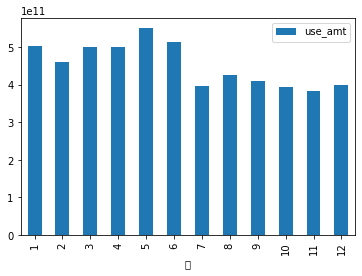

In [16]:
pd.pivot_table(data=df, index='월', values='use_amt', aggfunc='sum').plot(kind='bar')

In [17]:
# 시계열 데이터 분석 기초 part1
# 시계열 분석(time series)
# 1. 시간: 특정 간격을 갖는 시간 (lag)
#    - lag에서 data의 trend를 찾는다

# 2. 일변량 정상시계열
#    - ARIMA

# 3. trend : 추세(데이터의 변화되어 있는 모형)
# 4. seasonality: 계절성(주기에 따라 트렌드를 탐. 특정 주기별로 반복성을 탐)
# 5. cycle: 주기
# 6. noise: 잡음 -> white noise (변동)- 시간에 따라 독립이 되어 있고 통계적으로 분석이 가능함.
#                       -> 통계적, 기술적으로 분석이 가능한 경우

# 사실 실제 상황에서 time series 모델이 powerful 하지는 않다. 한계가 존재


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic') 

In [23]:
df = pd.read_csv("./big/testdata/04_음식관련 카드소비_CARD_SPENDING.CSV",encoding="CP949")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544805 entries, 0 to 544804
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   base_date   544805 non-null  object
 1   city        544805 non-null  object
 2   emd_cd      544805 non-null  object
 3   emd_nm      544805 non-null  object
 4   mct_cat_cd  544805 non-null  object
 5   mct_cat_nm  544805 non-null  object
 6   use_cnt     544805 non-null  int64 
 7   use_amt     544805 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 33.3+ MB


In [28]:
df['base_date'] = pd.to_datetime(df['base_date'])

In [31]:
df['base_date'].describe() 
# 2018년 1월 1일 ~ 2021년 6월 30일 자료
# 2020년 5월 16일 가장 많은 데이터가 존재(450)
# 1277일자의 데이터

<ipython-input-31-c9f6945fc9bc>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['base_date'].describe()


count                  544805
unique                   1277
top       2020-05-16 00:00:00
freq                      450
first     2018-01-01 00:00:00
last      2021-06-30 00:00:00
Name: base_date, dtype: object

In [32]:
df['Year'] = df['base_date'].dt.year
df['Month'] = df['base_date'].dt.month
df['Week'] = df['base_date'].dt.week
df['Day_of_week'] = df['base_date'].dt.day_name()

<ipython-input-32-159cd7ec57b6>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['base_date'].dt.week


In [33]:
df.head()

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt,Year,Month,Week,Day_of_week
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300,2018,1,1,Saturday
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675,2018,1,2,Tuesday
2,2018-01-15,제주시,50110650,연동,C01200,농축수산물,236,16089579,2018,1,3,Monday
3,2018-01-15,제주시,50110650,연동,A00200,마트/슈퍼마켓,4031,121979867,2018,1,3,Monday
4,2018-01-20,제주시,50110650,연동,C01000,식품,633,30410674,2018,1,3,Saturday


KeyboardInterrupt: 

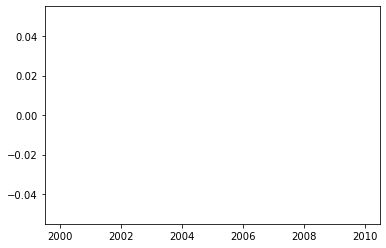

In [35]:
sns.lineplot(data=df, x='base_date',y='use_amt',estimator=sum)

In [37]:
p1 = pd.pivot_table(data=df, index='base_date',values='use_amt', aggfunc='sum').reset_index()

<AxesSubplot:xlabel='base_date', ylabel='use_amt'>

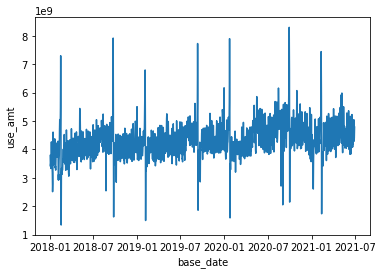

In [39]:
sns.lineplot(data=p1, x='base_date', y='use_amt')

In [41]:
p2 = pd.pivot_table(data=df, index=['base_date','mct_cat_nm'],values='use_amt', aggfunc='sum').reset_index()

<AxesSubplot:xlabel='base_date', ylabel='use_amt'>

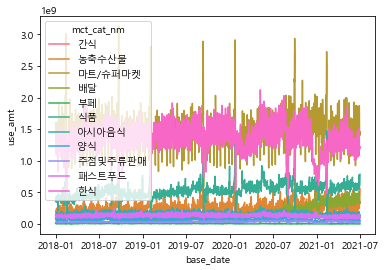

In [44]:
sns.lineplot(data=p2, x='base_date', y='use_amt', hue='mct_cat_nm')

# white noise : 한식의 경우 2021년 갑자기 뚝 떨어지는 것을 볼 수 있다.
#               이는 특별한 이벤트에 의해 일어난 일로
#               예측을 할 때 잡음이 될 가능성이 나타난다.
#               따라서 직접 예측을 할 때는 저 데이터를 제거하거나 대체하는 행동이 필요하다.

In [46]:
cond1 = (df['mct_cat_nm']=='한식')
df.loc[cond1]

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt,Year,Month,Week,Day_of_week
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300,2018,1,1,Saturday
11,2018-02-03,제주시,50110650,연동,C00100,한식,2973,102149753,2018,2,5,Saturday
12,2018-02-04,제주시,50110650,연동,C00100,한식,2337,81470246,2018,2,5,Sunday
16,2018-02-08,제주시,50110650,연동,C00100,한식,3306,107409730,2018,2,6,Thursday
33,2018-04-13,제주시,50110650,연동,C00100,한식,3670,108737634,2018,4,15,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
533741,2020-05-24,제주시,50110520,일도2동,C00100,한식,2943,92791366,2020,5,21,Sunday
533869,2020-04-09,제주시,XXXXXXXX,알수없음,C00100,한식,30,767096,2020,4,15,Thursday
533884,2021-05-05,제주시,XXXXXXXX,알수없음,C00100,한식,20,816480,2021,5,18,Wednesday
533898,2021-03-04,서귀포시,XXXXXXXX,알수없음,C00100,한식,20,778770,2021,3,9,Thursday


In [ ]:
# ARIMA (Auto Regressive integrated Moving Average Model)

# AR (Auto Regressive Model) : 자기회귀모델
#   - p 시점 전의 자료가 현재 시점의 데이터에 영향을 주는 자기회귀모델
#   - 주식, 어제 일어난 일이 다음에 영향을 줌. 
#   - 외부변동에 취약함 -> MA와 함께 사용 -> 불규칙한 변동을 제거
#   - 평균, 분산이 일정한 데이터, 변동이 없는 데이터(정상성 만족)

# MA (Moving Average Model) : 이동평균모델
#   - 일정한 구간 데이터의 평균을 계산해, 미래를 예측하는 모델

# Difference : 차분
#   - 정상성을 만족하지 못하는 데이터
#   - 과거의 변동이 현재에 어떤 영향을 주는지